In [252]:
# Import necessary libraries
import numpy as np
import scipy.sparse as sp
import scipy.stats as ss
import math
import fractions
import networkx as nx

num_edge_features = 5
num_node_features = 3
connect_prob = 0.1

In [85]:
# Lists of ISO standard modules and tooth numbers

modules = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10, 12, 16, 20, 25, 32, 40, 50,
           0.15, 0.25, 0.35, 0.45, 0.55, 0.7, 0.75, 0.9, 1.75, 2.25, 2.75, 3.5, 4.5, 5.5, 7, 9, 11, 14, 18, 22, 28, 36, 45,
           0.65, 3.25, 3.75, 6.5]
teeth = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
         41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
         70, 72, 75, 76, 80, 85, 90, 95, 100, 110, 114, 120, 127]

possible_rations = {}

In [86]:
for i in range(len(teeth)):
    for j in range(len(teeth)):
        ratio = fractions.Fraction(teeth[i],teeth[j])
        if ratio in possible_rations:
            possible_rations[ratio].append([teeth[i],teeth[j]])
        else:
            possible_rations[ratio] = []
            possible_rations[ratio].append([teeth[i],teeth[j]])
            
        ratio = fractions.Fraction(teeth[j],teeth[i])
        if ratio in possible_rations:
            possible_rations[ratio].append([teeth[j],teeth[i]])
        else:
            possible_rations[ratio] = []
            possible_rations[ratio].append([teeth[j],teeth[i]])
            
for k in possible_rations.keys():
    possible_rations[k] = np.unique(np.array(possible_rations[k]),axis=0)

In [87]:
# Import necessary libraries
import numpy as np
import scipy.sparse as sp
import scipy.stats as ss
import math as math

ef = 5
nf = 3
connect_prob = 0.1

# Lists of ISO standard modules and tooth numbers

modules = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10, 12, 16, 20, 25, 32, 40, 50,
           0.15, 0.25, 0.35, 0.45, 0.55, 0.7, 0.75, 0.9, 1.75, 2.25, 2.75, 3.5, 4.5, 5.5, 7, 9, 11, 14, 18, 22, 28, 36, 45,
           0.65, 3.25, 3.75, 6.5]
teeth = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
         41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
         70, 72, 75, 76, 80, 85, 90, 95, 100, 110, 114, 120, 127]

# Choose int in a range from a normal distribution
def normRange(low, high):
    x = np.arange(low, high+1)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, loc = ((low+high)/2), scale = ((high-low)/5)) - ss.norm.cdf(xL, loc = ((low+high)/2), scale = ((high-low)/6))
    prob = prob / prob.sum() # normalize the probabilities so their sum is 1
    
    return np.random.choice(x, p = prob)

In [88]:
def check_redundant(A,i):
    v_ne = list(np.where(A[i,:,0])[0])
    v_ne = list(set(v_ne))
    
    n_ne = len(v_ne)
    
    while True:
        if 0 in v_ne and A.shape[0]-1 in v_ne:
            return False
        else:
            v_ne += list(np.where(A[v_ne,:,0])[1])
            v_ne = list(set(v_ne))
            
        if len(v_ne) == n_ne:
            return True
        else:
            n_ne = len(v_ne)

In [242]:
def get_paths(A, u, n, visited, path, npaths):
    # Mark the current node as visited and store in path
    visited[u] = True
    path.append(u)
    # If current vertex is same as destination, then print
    # current path[]
    if u == n - 1:
#         print(path)
        npaths.append(list(path))
    else:
        # If current vertex is not destination
        # Recur for all the vertices adjacent to this vertex
        for i in list(np.where(A[u,:,0])[0]):
            if visited[i] == False:
                get_paths(A, i, n, visited, path, npaths)
    # Remove current vertex from path[] and mark it as unvisited
    path.pop()
    visited[u]= False
    
def all_paths(A):
    n = A.shape[0]
    visited = [False]*(n)
    path = []
    npaths = []
    grs = []
    grlist = []
    get_paths(A, 0, n, visited, path, npaths)
    
    return npaths

def non_redundant_shafts(A):
    paths = all_paths(A)
    non_redundant_shafts = np.unique(np.concatenate(paths))
    
    return non_redundant_shafts

In [243]:
def check_locking(A,n):
    visited = [False]*(n)
    path = []
    npaths = []
    grs = []
    grlist = []
    get_paths(A, 0, n, visited, path, npaths)
    for i in npaths:
        grt = 1
        for j in range(len(i)):
            gr = 0
            if j < len(i)-1:
                gr = (A[i[j], i[j+1], 3])/(A[i[j], i[j+1], 2])
                grt *= gr
                print(A[i[j], i[j+1], 3], A[i[j], i[j+1], 2])
                grlist.append([])
                grlist[j].append(gr)
        grs.append(grt)
        print("gear ratios list", grlist)
        print("total gear ratios", grs)
    return npaths

In [244]:
def calculate_omega(A):
    Omega = [-1]*A.shape[0]
    Omega[0] = fractions.Fraction(1,1)
    
    active_list = [0]
    visited_list = []
    while True:
        new_active_list = []
        for i in active_list:
            new_active_list += list(np.where(A[i,:,0])[0])
            for j in np.where(A[i,:,0])[0]:
                omega = -Omega[i] * fractions.Fraction(int(A[i,j,2]),int(A[i,j,3]))
                if Omega[j] == -1:
                    Omega[j] = omega
        visited_list += active_list
        active_list = np.array(list(set(new_active_list)))
        active_list = list(active_list[np.logical_not(np.isin(active_list,visited_list))])
        
        if len(active_list) == 0:
            break

    for i in range(A.shape[0]):
        for j in np.where(A[i,:,0])[0]:
            omega = -Omega[i] * fractions.Fraction(int(A[i,j,2]),int(A[i,j,3]))
            
            if Omega[j] != omega:
                print("Locking at %i,%i"%(i,j))
        
    return Omega

In [278]:
def generate_random_gear_box(n=None, Max_N = 10, Min_N = 3, C_prob = 0.1):
    if n is None:
        n = np.random.randint(low=Min_N,high=Max_N+1)

    # Instantiate adjacency matrix  
    A = np.zeros((n, n, 6))
    Omega = [-1]*n
    
    Omega[0] = fractions.Fraction(1,1)
    
    # Loop through the edges in the graph and assign their features
    for i in range(n):
        connected = False
        while not connected:
            connected = A[i,:,0].sum()>0
            for j in range(n):
                if (i != j) and (np.random.uniform() <= connect_prob) and not (i==0 and j==n-1) and not (j==0 and i==n-1):

                    if Omega[i] != -1 and Omega[j] != -1:
                        curren_ratio = Omega[j]/Omega[i]
                        if curren_ratio in possible_rations and curren_ratio<0:
                            teeth_pair = possible_rations[abs(curren_ratio)][np.random.choice(possible_rations[abs(curren_ratio)].shape[0])]
                            m = np.random.choice(modules)
                            t1 = teeth_pair[0] # tooth of gear 1
                            t2 = teeth_pair[1] # tooth of gear 2
                            alpha = math.pi/9 # pressure angle in radians
                            fw = (m*(t1+t2))/2 # face width in mm
                            A[i,j,0] = 1
                            A[i,j,1] = m
                            A[i,j,2] = t2
                            A[i,j,3] = t1
                            A[i,j,4] = alpha
                            A[i,j,5] = fw
                            A[j,i,:] = A[i,j,:]
                            A[j,i,2] = t1
                            A[j,i,3] = t2
                            connected = True
                    elif Omega[i] != -1 or Omega[j] != -1:
                        
                        rand_ratio = list(possible_rations.keys())[np.random.choice(len(list(possible_rations.keys())))]
                        m = np.random.choice(modules) # module in mm

                        teeth_pair = possible_rations[rand_ratio][np.random.choice(possible_rations[rand_ratio].shape[0])]

                        t1 = teeth_pair[0] # tooth of gear 1
                        t2 = teeth_pair[1] # tooth of gear 2
                        alpha = math.pi/9 # pressure angle in radians
                        fw = (m*(t1+t2))/2 # face width in mm
                        
                        if Omega[i] == -1:
                            Omega[i] = -Omega[j]/rand_ratio
                        else:
                            Omega[j] = -Omega[i]*rand_ratio
                        
                        A[i,j,0] = 1
                        A[i,j,1] = m
                        A[i,j,2] = t1
                        A[i,j,3] = t2
                        A[i,j,4] = alpha
                        A[i,j,5] = fw
                        A[j,i,:] = A[i,j,:]
                        A[j,i,2] = t2
                        A[j,i,3] = t1
                        connected = True
                    
    
#     # Instantiate an empty node feature matrix with the desired shape
#     N = np.zeros((n, nf))
#     # Loop through the nodes in the graph and assign their features
#     x0 = 0
#     y0 = 0
#     for i in range(n):
#         # Set origin to input shaft
#         if i == 0:
#             x = 0
#             y = 0
#             theta = 0
#         else:
#             #loop until there's a connection, and get relative position
#             for j in range(n):
#                 if A[i-1,j-1,0] == 1:
#                     ctc = A[i,j,1]*(A[i,j,2]+A[i,j,3]) # center to center distance = m*(t1+t2)
#                     theta = np.random.uniform(2*math.pi)
#                     x = x0 + ctc * math.sin(theta)
#                     y = y0 + ctc * math.cos(theta)
#         x0 = x
#         y0 = ypossible_rations

            
    non_redundant = non_redundant_shafts(A)
    A = A[non_redundant,:,:][:,non_redundant,:]
    
#     print(check_locking(A,n))
    #if check_locking(A,n):
    #    return generate_random_gear_box(n, Max_N, Min_N, C_prob)

    
    return A

In [279]:
while True:
    A = generate_random_gear_box(n=100, Max_N = 10, Min_N = 3, C_prob = 0.5)
    if len(all_paths(A))>1:
        break

In [280]:
all_paths(A)

[[0, 1, 3], [0, 2, 1, 3]]

In [282]:
A[:,:,0]

array([[0., 1., 1., 0.],
       [1., 0., 1., 1.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [283]:
G = nx.from_numpy_matrix(A[:,:,0])

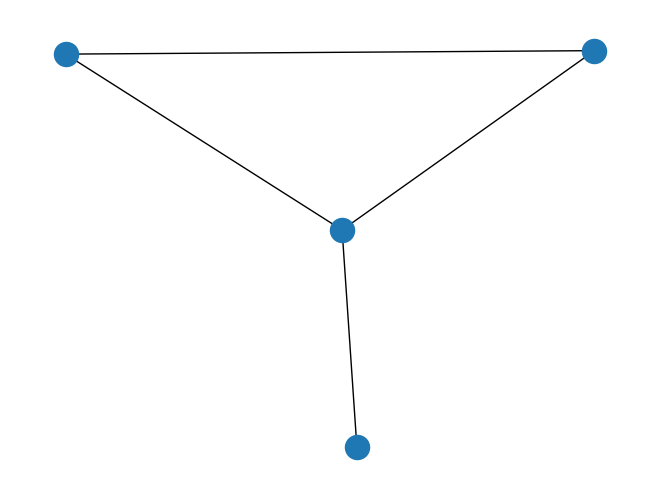

In [284]:
nx.draw(G)

In [285]:
calculate_omega(A)

Locking at 0,2
Locking at 2,0


[Fraction(1, 1), Fraction(-55, 27), Fraction(2420, 1323), Fraction(11, 5)]

In [66]:
fractions.Fraction(38,39) * fractions.Fraction(55,12)

Fraction(1045, 234)

In [65]:
A[1,7]

array([1.0e+00, 4.0e+01, 9.5e+01, 5.5e+01, 1.2e+01, 3.0e+03])

In [437]:


A = generate_random_gear_box(n=None, Max_N = 10, Min_N = 3, C_prob = 0.1)
while not (np.where(A[:,0,0])[0].any() or np.where(A[0,:,0])[0].any()):
       A = generate_random_gear_box(n=None, Max_N = 10, Min_N = 3, C_prob = 0.1)

[0, 2, 3, 4, 5, 7]
[0, 2, 3, 4, 7]
[0, 2, 3, 5, 4, 7]
[0, 2, 3, 5, 7]
[0, 2, 3, 7]
[0, 2, 6, 5, 3, 4, 7]
[0, 2, 6, 5, 3, 7]
[0, 2, 6, 5, 4, 3, 7]
[0, 2, 6, 5, 4, 7]
[0, 2, 6, 5, 7]
[0, 6, 2, 3, 4, 5, 7]
[0, 6, 2, 3, 4, 7]
[0, 6, 2, 3, 5, 4, 7]
[0, 6, 2, 3, 5, 7]
[0, 6, 2, 3, 7]
[0, 6, 5, 3, 4, 7]
[0, 6, 5, 3, 7]
[0, 6, 5, 4, 3, 7]
[0, 6, 5, 4, 7]
[0, 6, 5, 7]
65.0 62.0
15.0 70.0
42.0 62.0
54.0 16.0
57.0 48.0
gear ratios list [[1.0483870967741935], [0.21428571428571427], [0.6774193548387096], [3.375], [1.1875]]
total gear ratios [0.6099298419614982]
65.0 62.0
15.0 70.0
42.0 62.0
24.0 33.0
gear ratios list [[1.0483870967741935, 1.0483870967741935], [0.21428571428571427, 0.21428571428571427], [0.6774193548387096, 0.6774193548387096], [3.375, 0.7272727272727273], [1.1875], [], [], [], []]
total gear ratios [0.6099298419614982, 0.110680162709299]
65.0 62.0
15.0 70.0
37.0 64.0
54.0 16.0
24.0 33.0
gear ratios list [[1.0483870967741935, 1.0483870967741935, 1.0483870967741935], [0.2142857142857

In [439]:
print(A[:,:,0].astype(int))

[[0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 1 0]
 [0 0 1 0 1 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 0 0 1 1 0 1 1]
 [1 0 1 0 0 1 0 0]
 [0 0 0 1 1 1 0 0]]
